<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/iris2.png?raw=true" width=800 align="left"/>

# 실습 내용

- Iris 데이터로 모델링합니다.
- Logistic Regression 알고리즘으로 모델링합니다.


# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/iris.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# 기술통계 확인
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# 범주값 개수 확인
data['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [6]:
# 상관관계 확인
data.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

- target 변수를 명확히 지정합니다.
- target을 제외한 변수를 x 데이터프레임으로 선언합니다.
- y 데이터프레임은 target 변수만을 가집니다.

In [7]:
# target 확인
target = 'Species'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**2) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [8]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.

In [9]:
# 1단계: 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
# 2단계: 선언하기
modelLR = LogisticRegression()

In [11]:
# 3단계: 학습하기
modelLR.fit(x_train, y_train)

LogisticRegression()

In [12]:
# 4단계: 예측하기
y_pred = modelLR.predict(x_test)

In [13]:
# 5단계 평가하기
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.94      0.97        18
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


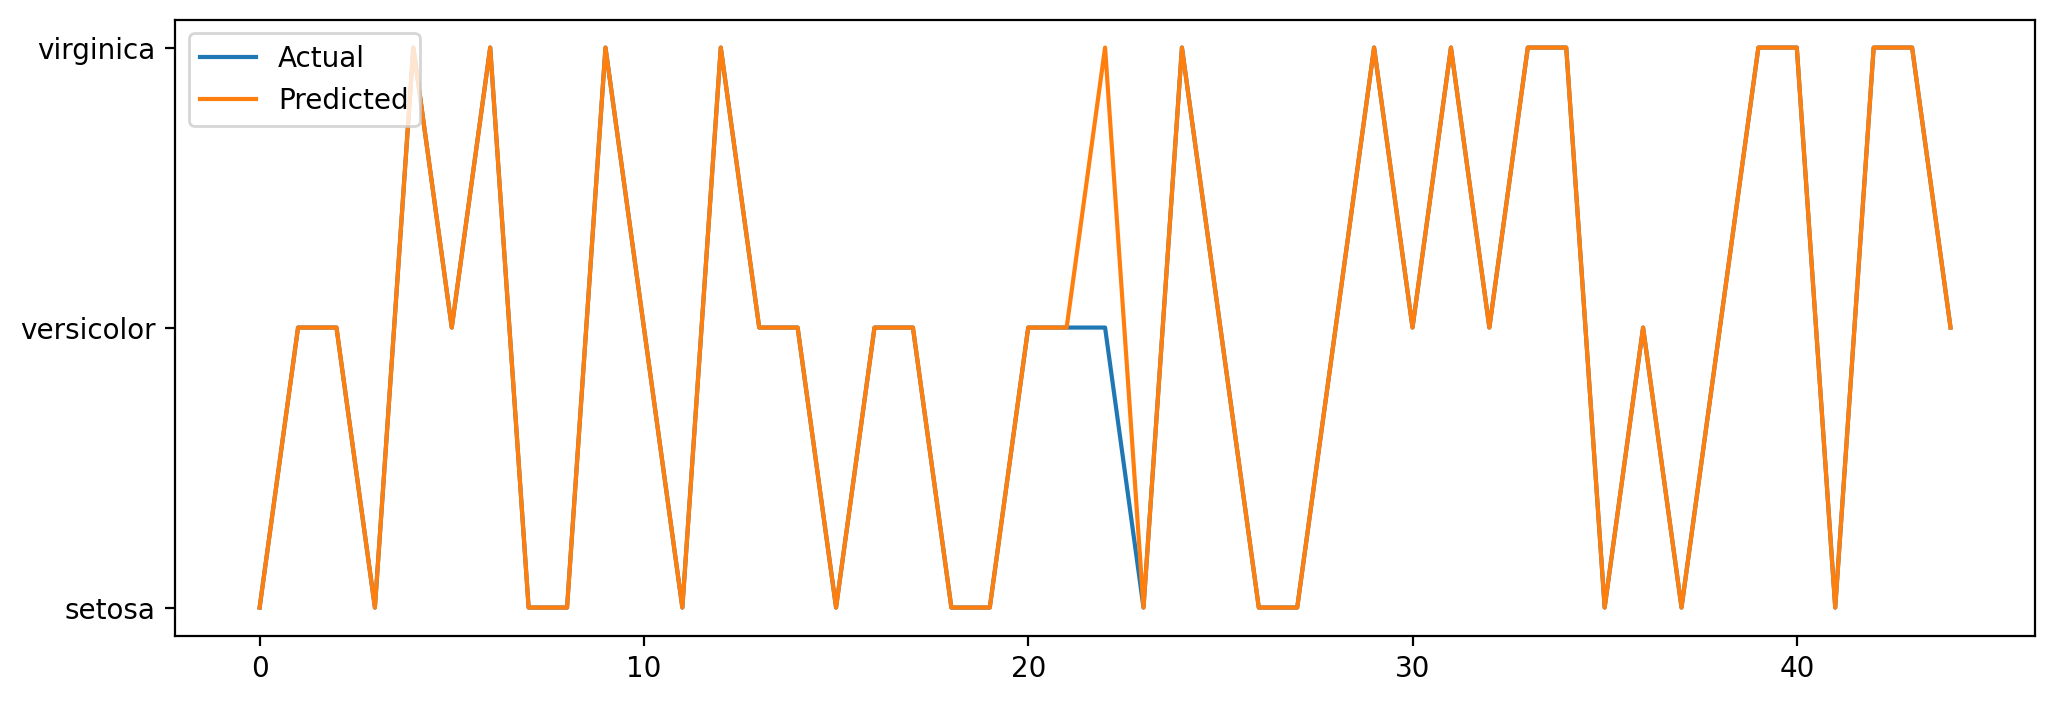

In [17]:
# 시각화
plt.figure(figsize=(12,4))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.show()

In [18]:
# 확률값
p = modelLR.predict_proba(x_test)
p[:10].round(2)

array([[0.98, 0.02, 0.  ],
       [0.27, 0.72, 0.  ],
       [0.01, 0.87, 0.12],
       [0.99, 0.01, 0.  ],
       [0.  , 0.02, 0.98],
       [0.  , 0.59, 0.41],
       [0.  , 0.13, 0.87],
       [0.96, 0.04, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.  , 0.03, 0.97]])

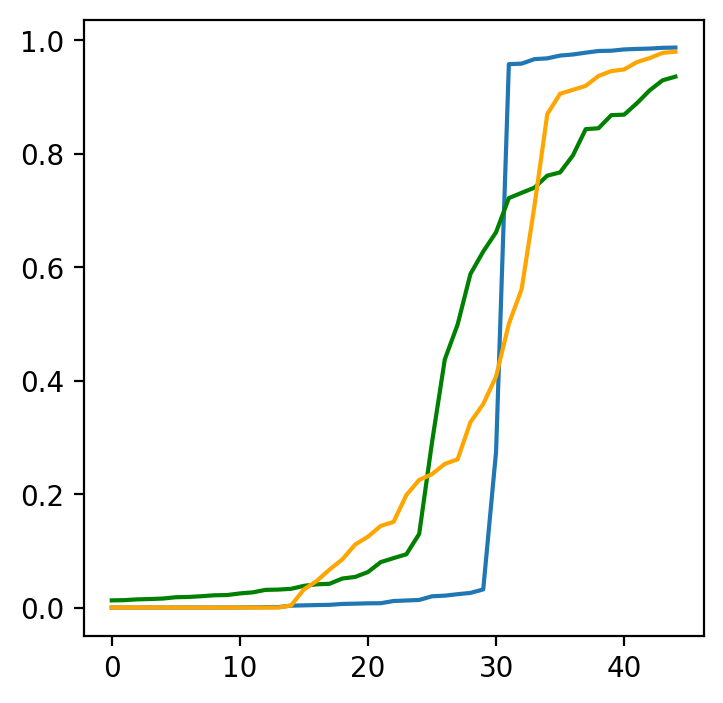

In [43]:
# 시그모이드 그래프 시각화
plt.figure(figsize=(4,4))
plt.plot(np.sort(p[:, 0]), color = 'tab:blue')
plt.plot(np.sort(p[:, 1]), color = 'green')
plt.plot(np.sort(p[:, 2]), color = 'orange')
plt.show()